# Vibration Analysis System: Early Fault Detection Through Machine Learning

**By:** Ahmed Ayaz

**Date:** 12/10/2024

---

## Table of Contents

| **Section**                     |  
|----------------------------------|  
| **Section 1: Introduction**      |  
| **Section 2: Data Analysis and Exploration**  |  
| **Section 3: Signal Processing** |  
| **Section 4: Modeling and Prediction** |  
| **Section 5: Results**           |  
| **Section 6: References**        |  

---

## Section 1: Introduction

### 1.1 Project Overview
This project develops an intelligent system for early fault detection in industrial bearings using advanced signal processing and machine learning techniques. Using the NASA Bearing Dataset, which documents the progression of three specific types of bearing failures (inner race defects, roller element damage, and outer race deterioration), we analyze vibration patterns to identify early warning signs of impending failure. The project focuses on understanding how vibration signatures evolve throughout a bearing's lifetime, from healthy operation through to failure, enabling the detection of deterioration well before catastrophic damage occurs.

### 1.2 Key Questions
1. **What are the characteristic vibration patterns associated with each known type of bearing failure as they progress?**
2. **Which frequency bands and statistical measures provide the earliest reliable indicators of bearing deterioration?**
3. **How early in a bearing's lifecycle can we detect significant deviations from healthy operation?**
4. **What are the distinct progression patterns for inner race, roller element, and outer race failures?**

### 1.3 Project Objective
The primary goal is to develop a robust, predictive system that can detect bearing deterioration in its early stages. By analyzing both time-domain and frequency-domain characteristics of bearing vibrations, we aim to establish reliable early warning indicators for known failure modes. This understanding will enable maintenance teams to intervene at the optimal time, before failures become critical but not so early as to waste bearing life.

### 1.4 Project Importance
Early detection of bearing deterioration is crucial across numerous industries, from manufacturing to power generation. Bearing failures can lead to costly downtime, safety hazards, and cascading equipment damage. Traditional maintenance schedules often result in either premature replacement of healthy bearings or unexpected failures of degraded ones. This project's intelligent monitoring approach offers several key benefits:

- **Cost Reduction**: Early detection allows for planned maintenance rather than emergency repairs
- **Safety Enhancement**: Preventing catastrophic failures reduces workplace hazards
- **Equipment Longevity**: Optimal maintenance timing extends bearing and machinery lifespan
- **Production Efficiency**: Minimizing unexpected downtime improves overall operational efficiency

### 1.5 Technical Foundation
The project leverages several key technical domains:
- Signal Processing: Advanced filtering and frequency analysis techniques for isolating meaningful vibration patterns
- Statistical Analysis: Time-domain and frequency-domain statistical measures to quantify deterioration
- Machine Learning: Pattern recognition for early detection of known failure progressions
- Data Engineering: Processing and analysis of high-frequency vibration data

This comprehensive approach combines traditional signal processing methods with modern machine learning techniques to create a more reliable and accurate fault detection system. By focusing on known failure modes and their progression patterns, we can develop highly specific and sensitive detection methods for each type of bearing deterioration.

---
## Section 2: Data Analysis and Exploration

### **2.1 Imports**  
We begin by importing the necessary libraries for data handling, visualization, signal processing, and modeling:  

- **Pandas and NumPy**: For efficient data handling, creation, and manipulation.  
- **Matplotlib and Seaborn**: To create clear and insightful visualizations.  
- **SciPy**: For advanced signal processing functions.  
- **Scikit-learn**: To split the dataset and build the machine learning model.  
- **Pathlib**: For easier file and directory path management.   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **2.2 Loading and Exploring Datasets**

- **Dataset 1**: The number of files in the first test set is counted to ensure completeness.  
- **Dataset 2**: Similarly, we count the files in the second test set.  
- **Dataset 3**: Files are sorted, and the first and last filenames are printed to verify the dataset’s integrity.  
- **Uniqueness Check**: For the third dataset, we check whether all files are unique, ensuring data reliability.  


In [4]:
data_path_1 = Path("../datasets/1st_test")
# List files in the directory
files_1 = list(data_path_1.glob('*'))
print("Number of files in set 1:", len(files_1))

data_path_2 = Path("../datasets/2nd_test")
files_2 = list(data_path_2.glob('*'))
print("Number of files in set 2:", len(files_2))

data_path_3 = Path("../datasets/3rd_test")
files_3 = sorted(list(data_path_3.glob('*')))

print("First file in set 3:", files_3[0].name)
print("Last file in set 3:", files_3[-1].name)
print("Total files in set 3:", len(files_3))

# Let's check if files are unique
unique_files = set(files_3)
print("\nUnique files in set 3:", len(unique_files))

Number of files in set 1: 2156
Number of files in set 2: 984
First file in set 3: 2004.03.04.09.27.46
Last file in set 3: 2004.04.18.02.42.55
Total files in set 3: 6324

Unique files in set 3: 6324


Now that we have loaded our datasets, let’s explore their contents and familiarize ourselves with the structure of the files:  

- **File Inspection**: We examine the first file from each dataset to understand its structure and shape.  
- **Dataset 1**:  
  - The shape of the first file is printed to determine its dimensions.  
  - The first few rows of data are displayed to understand the format and content.  
- **Dataset 2**:  
  - Similarly, we inspect the shape and preview the first few rows of the first file in this set.  
- **Dataset 3**:  
  - We repeat the same process, analyzing the structure of the first file.  

This step helps in identifying the format of the data, ensuring compatibility with further processing steps.  

In [8]:
first_file_path = files_1[0]  
raw_data_1 = np.loadtxt(first_file_path)

print("\nShape of set 1:", raw_data_1.shape)
print("\nFirst few rows of the data:")
print(raw_data_1[:5])

print("------------------------------------------------------------------------------------------------------------------")

second_file_path = files_2[0]  
raw_data_2 = np.loadtxt(second_file_path)

print("\nShape of set 2:", raw_data_2.shape)
print("\nFirst few rows of the data:")
print(raw_data_2[:5])

print("------------------------------------------------------------------------------------------------------------------")

third_file_path = files_3[0]  
raw_data_3 = np.loadtxt(third_file_path)

print("\nShape of set 3:", raw_data_3.shape)
print("\nFirst few rows of the data:")
print(raw_data_3[:5])


Shape of set 1: (20480, 8)

First few rows of the data:
[[-0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142]
 [-0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122]
 [-0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071]
 [-0.178 -0.161 -0.159 -0.178 -0.1   -0.115 -0.112 -0.078]
 [-0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066]]
------------------------------------------------------------------------------------------------------------------

Shape of set 2: (20480, 4)

First few rows of the data:
[[-0.049 -0.071 -0.132 -0.01 ]
 [-0.042 -0.073 -0.007 -0.105]
 [ 0.015  0.     0.007  0.   ]
 [-0.051  0.02  -0.002  0.1  ]
 [-0.107  0.01   0.127  0.054]]
------------------------------------------------------------------------------------------------------------------

Shape of set 3: (20480, 4)

First few rows of the data:
[[ 0.034  0.264  0.039 -0.046]
 [ 0.103  0.083 -0.061 -0.012]
 [ 0.095 -0.039 -0.007  0.039]
 [ 0.     0.11   0.022 -0.002]
 [ 0.005  0.154 -0.127 

Now that we have loaded our datasets, let’s visualize the raw vibration data to understand how each channel behaves over time:

- We start by creating a time array for the x-axis, our default sampling rate is 20 Hz as told in our dataset  
- **Dataset 1**:  
  - We create subplots for the 8 channels in this dataset, plotting the amplitude against time for each channel.  
- **Dataset 2**:  
  - A similar approach is applied for the 4 channels in the second dataset.  
- **Dataset 3**:  
  - Finally, we plot the 4 channels in the third dataset using the same structure.

These visualizations allow us to inspect the amplitude variations across the channels and observe any noticeable trends.

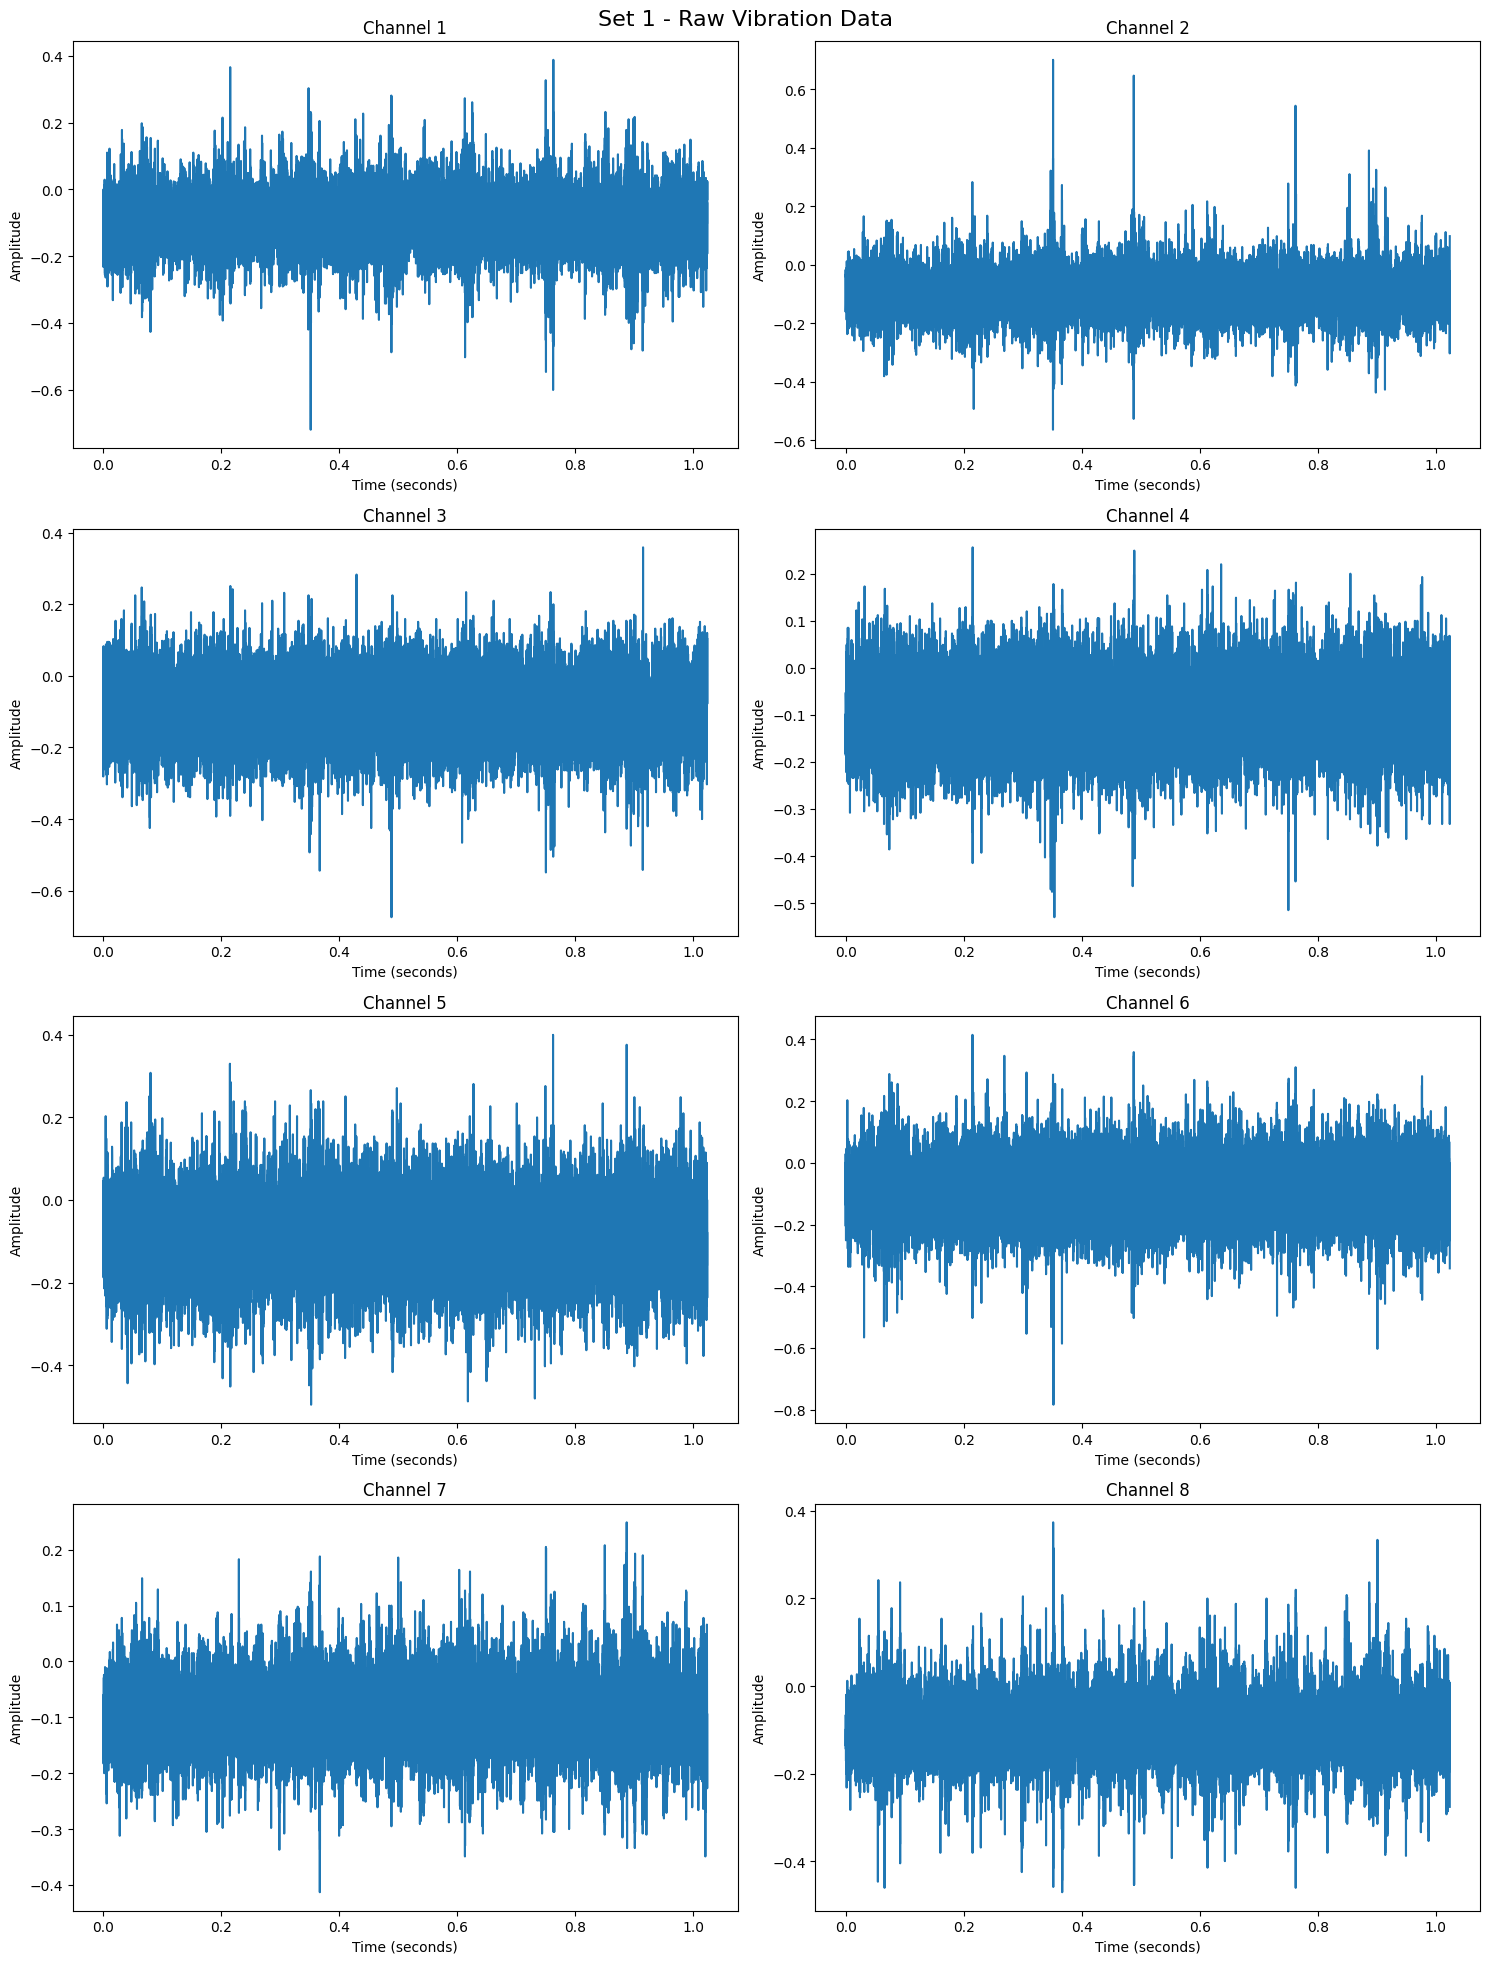

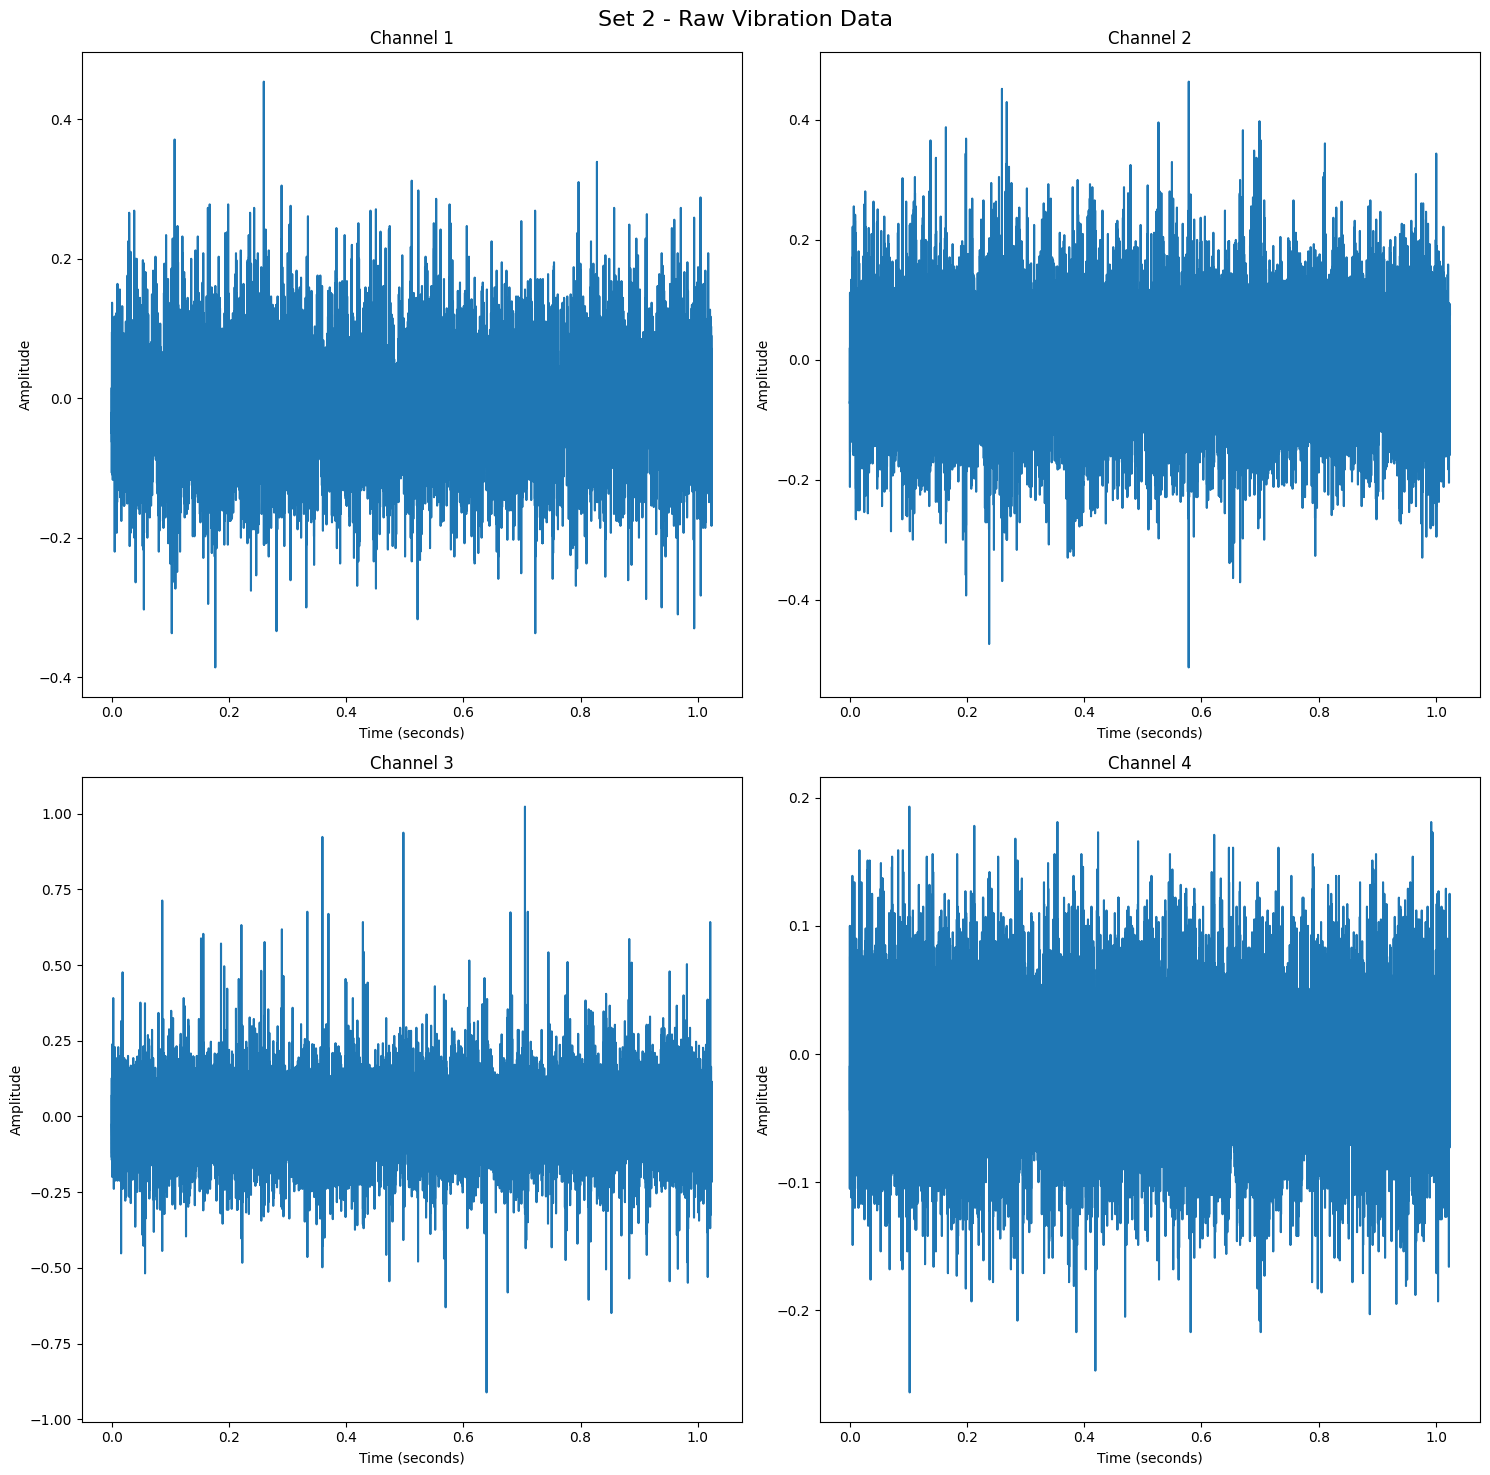

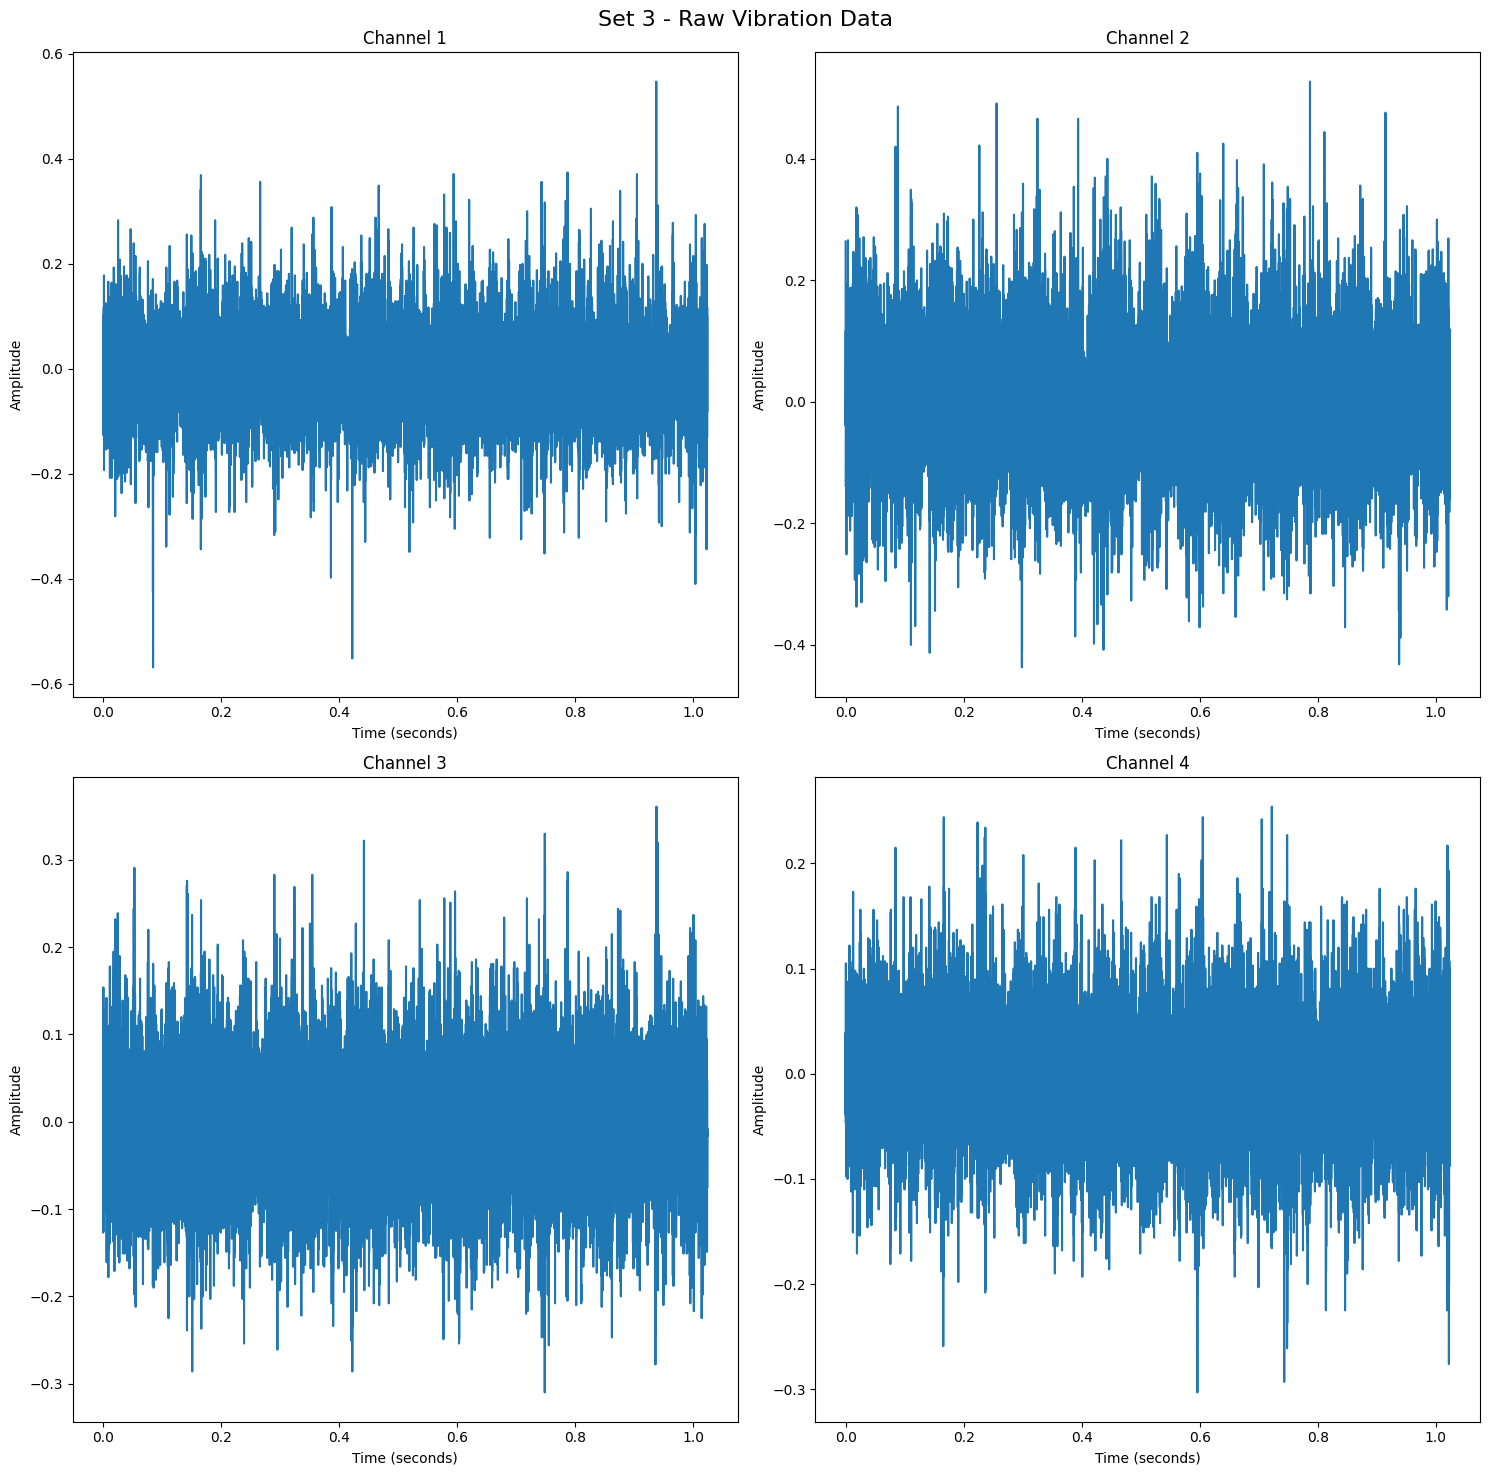

In [11]:
# Function to create time array for x-axis
def create_time_array(data_length, sampling_rate=20000):
    return np.arange(data_length) / sampling_rate

# Create plots for Set 1 (8 channels)
time = create_time_array(len(raw_data_1))
fig1, axes1 = plt.subplots(4, 2, figsize=(15, 20))
fig1.suptitle('Set 1 - Raw Vibration Data', size=16)

for i in range(4):
    for j in range(2):
        channel = i * 2 + j
        axes1[i,j].plot(time, raw_data_1[:, channel])
        axes1[i,j].set_title(f'Channel {channel + 1}')
        axes1[i,j].set_xlabel('Time (seconds)')
        axes1[i,j].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Create plots for Set 2 (4 channels)
time = create_time_array(len(raw_data_2))
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 15))
fig2.suptitle('Set 2 - Raw Vibration Data', size=16)

for i in range(2):
    for j in range(2):
        channel = i * 2 + j
        axes2[i,j].plot(time, raw_data_2[:, channel])
        axes2[i,j].set_title(f'Channel {channel + 1}')
        axes2[i,j].set_xlabel('Time (seconds)')
        axes2[i,j].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Create plots for Set 3 (4 channels)
time = create_time_array(len(raw_data_3))
fig3, axes3 = plt.subplots(2, 2, figsize=(15, 15))
fig3.suptitle('Set 3 - Raw Vibration Data', size=16)

for i in range(2):
    for j in range(2):
        channel = i * 2 + j
        axes3[i,j].plot(time, raw_data_3[:, channel])
        axes3[i,j].set_title(f'Channel {channel + 1}')
        axes3[i,j].set_xlabel('Time (seconds)')
        axes3[i,j].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

### **2.3 Basic Statistics and Data Analysis**

In this subsection, we focus on extracting basic statistical metrics from the raw vibration data to help understand the characteristics of each channel. The two functions `get_bearing_statistics` and `process_bearing_files` serve as the core for this analysis.

#### **`get_bearing_statistics(data)`**
This function computes key statistical metrics for each channel in the provided dataset. It calculates:

- **Mean**: The average value of the data in each channel.
- **Standard Deviation (std)**: A measure of the spread of the data.
- **Max**: The maximum value in the channel's data.
- **Min**: The minimum value in the channel's data.
- **Root Mean Square (RMS)**: The square root of the average of the squared values, which gives a measure of the signal's magnitude.
- **Peak-to-Peak**: The difference between the maximum and minimum values, representing the range of values in the data.

These statistics are computed for each channel, and the results are stored in a dictionary for easy access.

#### **`process_bearing_files(data_path)`**
This function processes all the files in a given directory (dataset folder). It does the following:

- Iterates through all files in the dataset folder.
- Loads the raw data from each file.
- Calls `get_bearing_statistics` to compute the statistics for each dataset.
- Returns a list of timestamps (from the filenames) and a list of statistics for each file.

The function provides a summary of the total number of files processed and outputs the statistical analysis for each channel in each file.

These functions help in getting a quantitative understanding of the vibration data, which is essential for detecting anomalies or faults in the bearings.

In [12]:
def get_bearing_statistics(data):
    stats_dict = {}
    
    # Get number of channels from data shape
    num_channels = data.shape[1]  # This will be 8 for Set 1, 4 for Sets 2&3
    
    for channel in range(num_channels):
        channel_data = data[:, channel]
        
        stats_dict[f'Channel_{channel+1}'] = {
            'mean': np.mean(channel_data),
            'std': np.std(channel_data),
            'max': np.max(channel_data),
            'min': np.min(channel_data),
            'rms': np.sqrt(np.mean(channel_data**2)),
            'peak_to_peak': np.max(channel_data) - np.min(channel_data)
        }
    
    return stats_dict

In [13]:
def process_bearing_files(data_path):
    timestamps = []
    all_stats = []
    
    for file in sorted(data_path.glob("*")):
        timestamps.append(file.stem)
        data = np.loadtxt(file)
        stats = get_bearing_statistics(data)  # Uses single function for all sets
        all_stats.append(stats)
    
    print(f"Total files processed: {len(timestamps)}")
    return timestamps, all_stats

In [14]:
timestamps_1, statistics_1 = process_bearing_files(data_path_1)
timestamps_2, statistics_2 = process_bearing_files(data_path_2)
timestamps_3, statistics_3 = process_bearing_files(data_path_3)

Total files processed: 2156
Total files processed: 984
Total files processed: 6324


#### Now let's plot our key statistical metrics for each bearing

#### Starting with Set 1

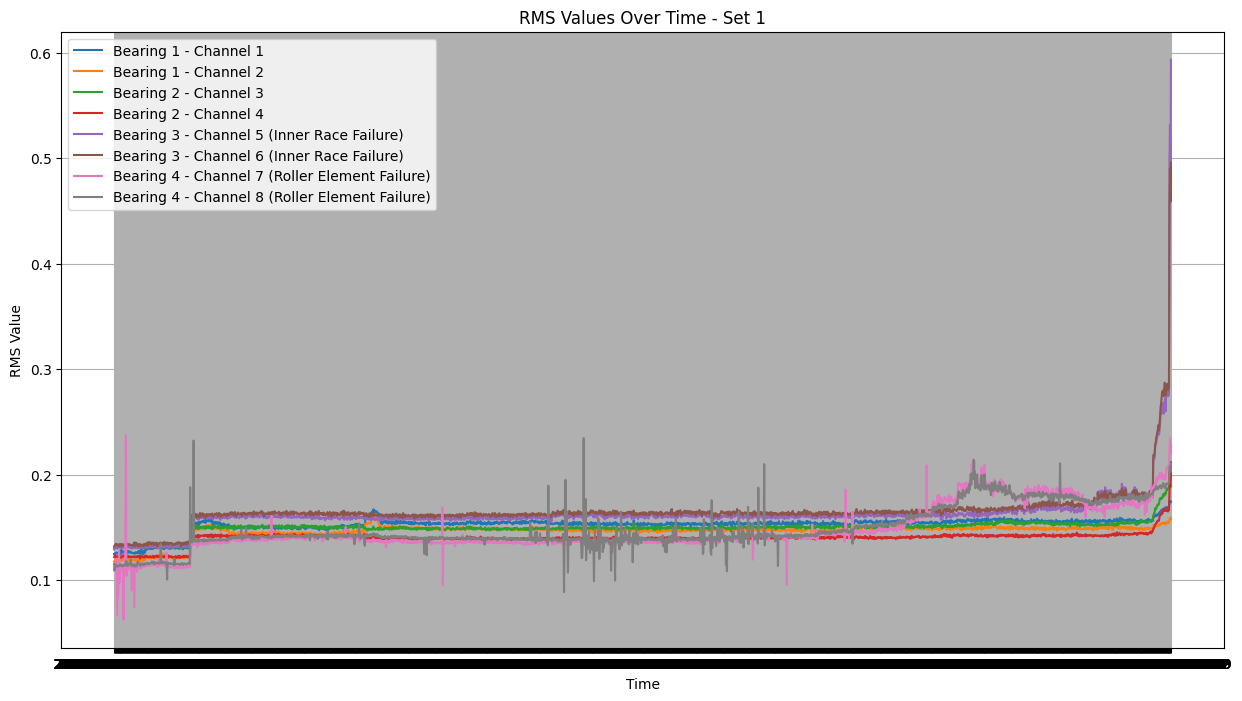

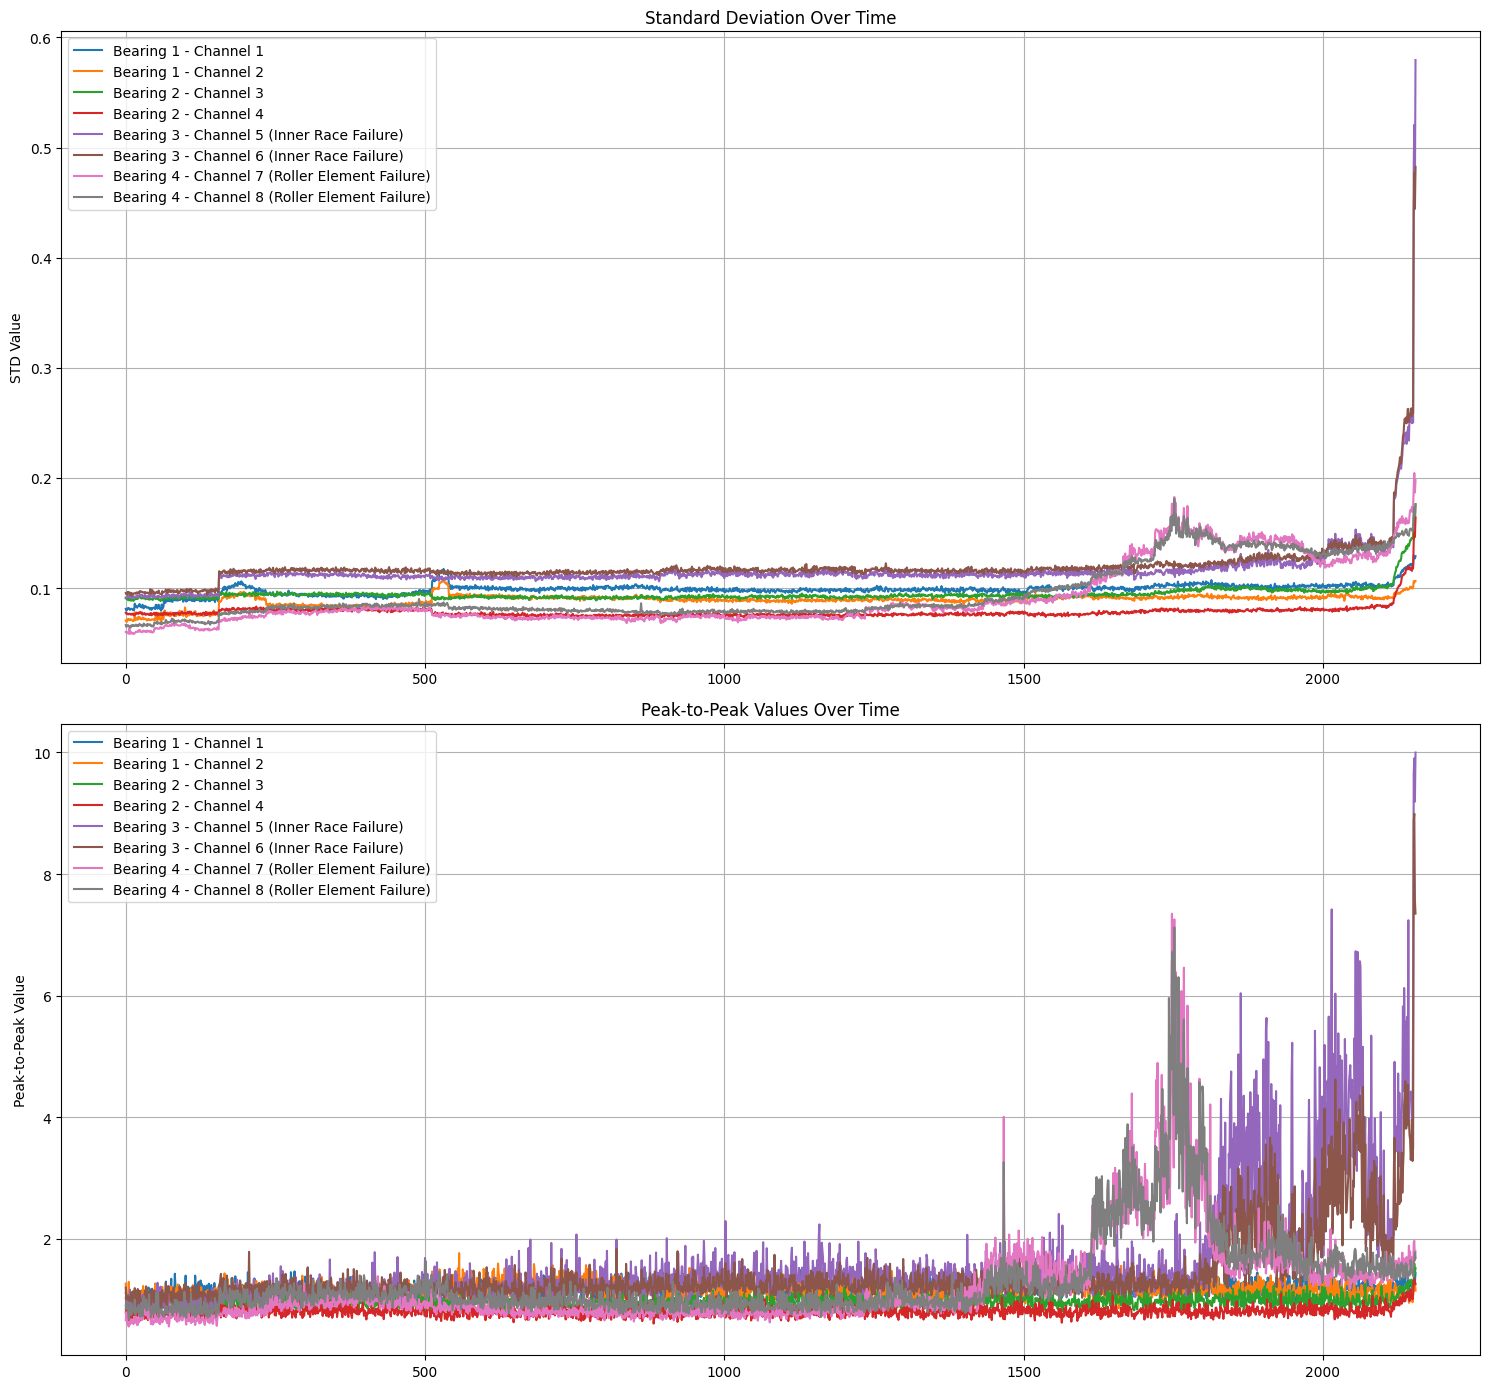

In [16]:
# Create lists to store data
times = []
bearing_stats = {
    'bearing1_ch1_rms': [], 'bearing1_ch2_rms': [],
    'bearing2_ch3_rms': [], 'bearing2_ch4_rms': [],
    'bearing3_ch5_rms': [], 'bearing3_ch6_rms': [],
    'bearing4_ch7_rms': [], 'bearing4_ch8_rms': []
}

# Extract RMS values for each channel over time
for time, stats in zip(timestamps_1, statistics_1):
    times.append(time)
    # Get RMS values for each channel of each bearing
    bearing_stats['bearing1_ch1_rms'].append(stats['Channel_1']['rms'])
    bearing_stats['bearing1_ch2_rms'].append(stats['Channel_2']['rms'])
    bearing_stats['bearing2_ch3_rms'].append(stats['Channel_3']['rms'])
    bearing_stats['bearing2_ch4_rms'].append(stats['Channel_4']['rms'])
    bearing_stats['bearing3_ch5_rms'].append(stats['Channel_5']['rms'])
    bearing_stats['bearing3_ch6_rms'].append(stats['Channel_6']['rms'])
    bearing_stats['bearing4_ch7_rms'].append(stats['Channel_7']['rms'])
    bearing_stats['bearing4_ch8_rms'].append(stats['Channel_8']['rms'])

# Create DataFrame
df_stats = pd.DataFrame(bearing_stats, index=times)

# Plot RMS trends for all channels
plt.figure(figsize=(15, 8))
plt.plot(df_stats['bearing1_ch1_rms'], label='Bearing 1 - Channel 1')
plt.plot(df_stats['bearing1_ch2_rms'], label='Bearing 1 - Channel 2')
plt.plot(df_stats['bearing2_ch3_rms'], label='Bearing 2 - Channel 3')
plt.plot(df_stats['bearing2_ch4_rms'], label='Bearing 2 - Channel 4')
plt.plot(df_stats['bearing3_ch5_rms'], label='Bearing 3 - Channel 5 (Inner Race Failure)')
plt.plot(df_stats['bearing3_ch6_rms'], label='Bearing 3 - Channel 6 (Inner Race Failure)')
plt.plot(df_stats['bearing4_ch7_rms'], label='Bearing 4 - Channel 7 (Roller Element Failure)')
plt.plot(df_stats['bearing4_ch8_rms'], label='Bearing 4 - Channel 8 (Roller Element Failure)')
plt.title('RMS Values Over Time - Set 1')
plt.xlabel('Time')
plt.ylabel('RMS Value')
plt.legend()
plt.grid(True)
plt.show()

# Create figure with 2 subplots (std and peak-to-peak)
fig, axes = plt.subplots(2, 1, figsize=(15, 14))

# --- Standard Deviation ---
# Extracting std values for all 8 channels
bearing_std = {
    'bearing1_ch1_std': [stats['Channel_1']['std'] for stats in statistics_1],
    'bearing1_ch2_std': [stats['Channel_2']['std'] for stats in statistics_1],
    'bearing2_ch3_std': [stats['Channel_3']['std'] for stats in statistics_1],
    'bearing2_ch4_std': [stats['Channel_4']['std'] for stats in statistics_1],
    'bearing3_ch5_std': [stats['Channel_5']['std'] for stats in statistics_1],
    'bearing3_ch6_std': [stats['Channel_6']['std'] for stats in statistics_1],
    'bearing4_ch7_std': [stats['Channel_7']['std'] for stats in statistics_1],
    'bearing4_ch8_std': [stats['Channel_8']['std'] for stats in statistics_1]
}

# Plotting std values
axes[0].plot(bearing_std['bearing1_ch1_std'], label='Bearing 1 - Channel 1')
axes[0].plot(bearing_std['bearing1_ch2_std'], label='Bearing 1 - Channel 2')
axes[0].plot(bearing_std['bearing2_ch3_std'], label='Bearing 2 - Channel 3')
axes[0].plot(bearing_std['bearing2_ch4_std'], label='Bearing 2 - Channel 4')
axes[0].plot(bearing_std['bearing3_ch5_std'], label='Bearing 3 - Channel 5 (Inner Race Failure)')
axes[0].plot(bearing_std['bearing3_ch6_std'], label='Bearing 3 - Channel 6 (Inner Race Failure)')
axes[0].plot(bearing_std['bearing4_ch7_std'], label='Bearing 4 - Channel 7 (Roller Element Failure)')
axes[0].plot(bearing_std['bearing4_ch8_std'], label='Bearing 4 - Channel 8 (Roller Element Failure)')
axes[0].set_title('Standard Deviation Over Time')
axes[0].set_ylabel('STD Value')
axes[0].grid(True)
axes[0].legend()

# --- Peak-to-Peak ---
# Extracting peak-to-peak values for all 8 channels
bearing_p2p = {
    'bearing1_ch1_p2p': [stats['Channel_1']['peak_to_peak'] for stats in statistics_1],
    'bearing1_ch2_p2p': [stats['Channel_2']['peak_to_peak'] for stats in statistics_1],
    'bearing2_ch3_p2p': [stats['Channel_3']['peak_to_peak'] for stats in statistics_1],
    'bearing2_ch4_p2p': [stats['Channel_4']['peak_to_peak'] for stats in statistics_1],
    'bearing3_ch5_p2p': [stats['Channel_5']['peak_to_peak'] for stats in statistics_1],
    'bearing3_ch6_p2p': [stats['Channel_6']['peak_to_peak'] for stats in statistics_1],
    'bearing4_ch7_p2p': [stats['Channel_7']['peak_to_peak'] for stats in statistics_1],
    'bearing4_ch8_p2p': [stats['Channel_8']['peak_to_peak'] for stats in statistics_1]
}

# Plotting peak-to-peak values
axes[1].plot(bearing_p2p['bearing1_ch1_p2p'], label='Bearing 1 - Channel 1')
axes[1].plot(bearing_p2p['bearing1_ch2_p2p'], label='Bearing 1 - Channel 2')
axes[1].plot(bearing_p2p['bearing2_ch3_p2p'], label='Bearing 2 - Channel 3')
axes[1].plot(bearing_p2p['bearing2_ch4_p2p'], label='Bearing 2 - Channel 4')
axes[1].plot(bearing_p2p['bearing3_ch5_p2p'], label='Bearing 3 - Channel 5 (Inner Race Failure)')
axes[1].plot(bearing_p2p['bearing3_ch6_p2p'], label='Bearing 3 - Channel 6 (Inner Race Failure)')
axes[1].plot(bearing_p2p['bearing4_ch7_p2p'], label='Bearing 4 - Channel 7 (Roller Element Failure)')
axes[1].plot(bearing_p2p['bearing4_ch8_p2p'], label='Bearing 4 - Channel 8 (Roller Element Failure)')
axes[1].set_title('Peak-to-Peak Values Over Time')
axes[1].set_ylabel('Peak-to-Peak Value')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


#### Set 2

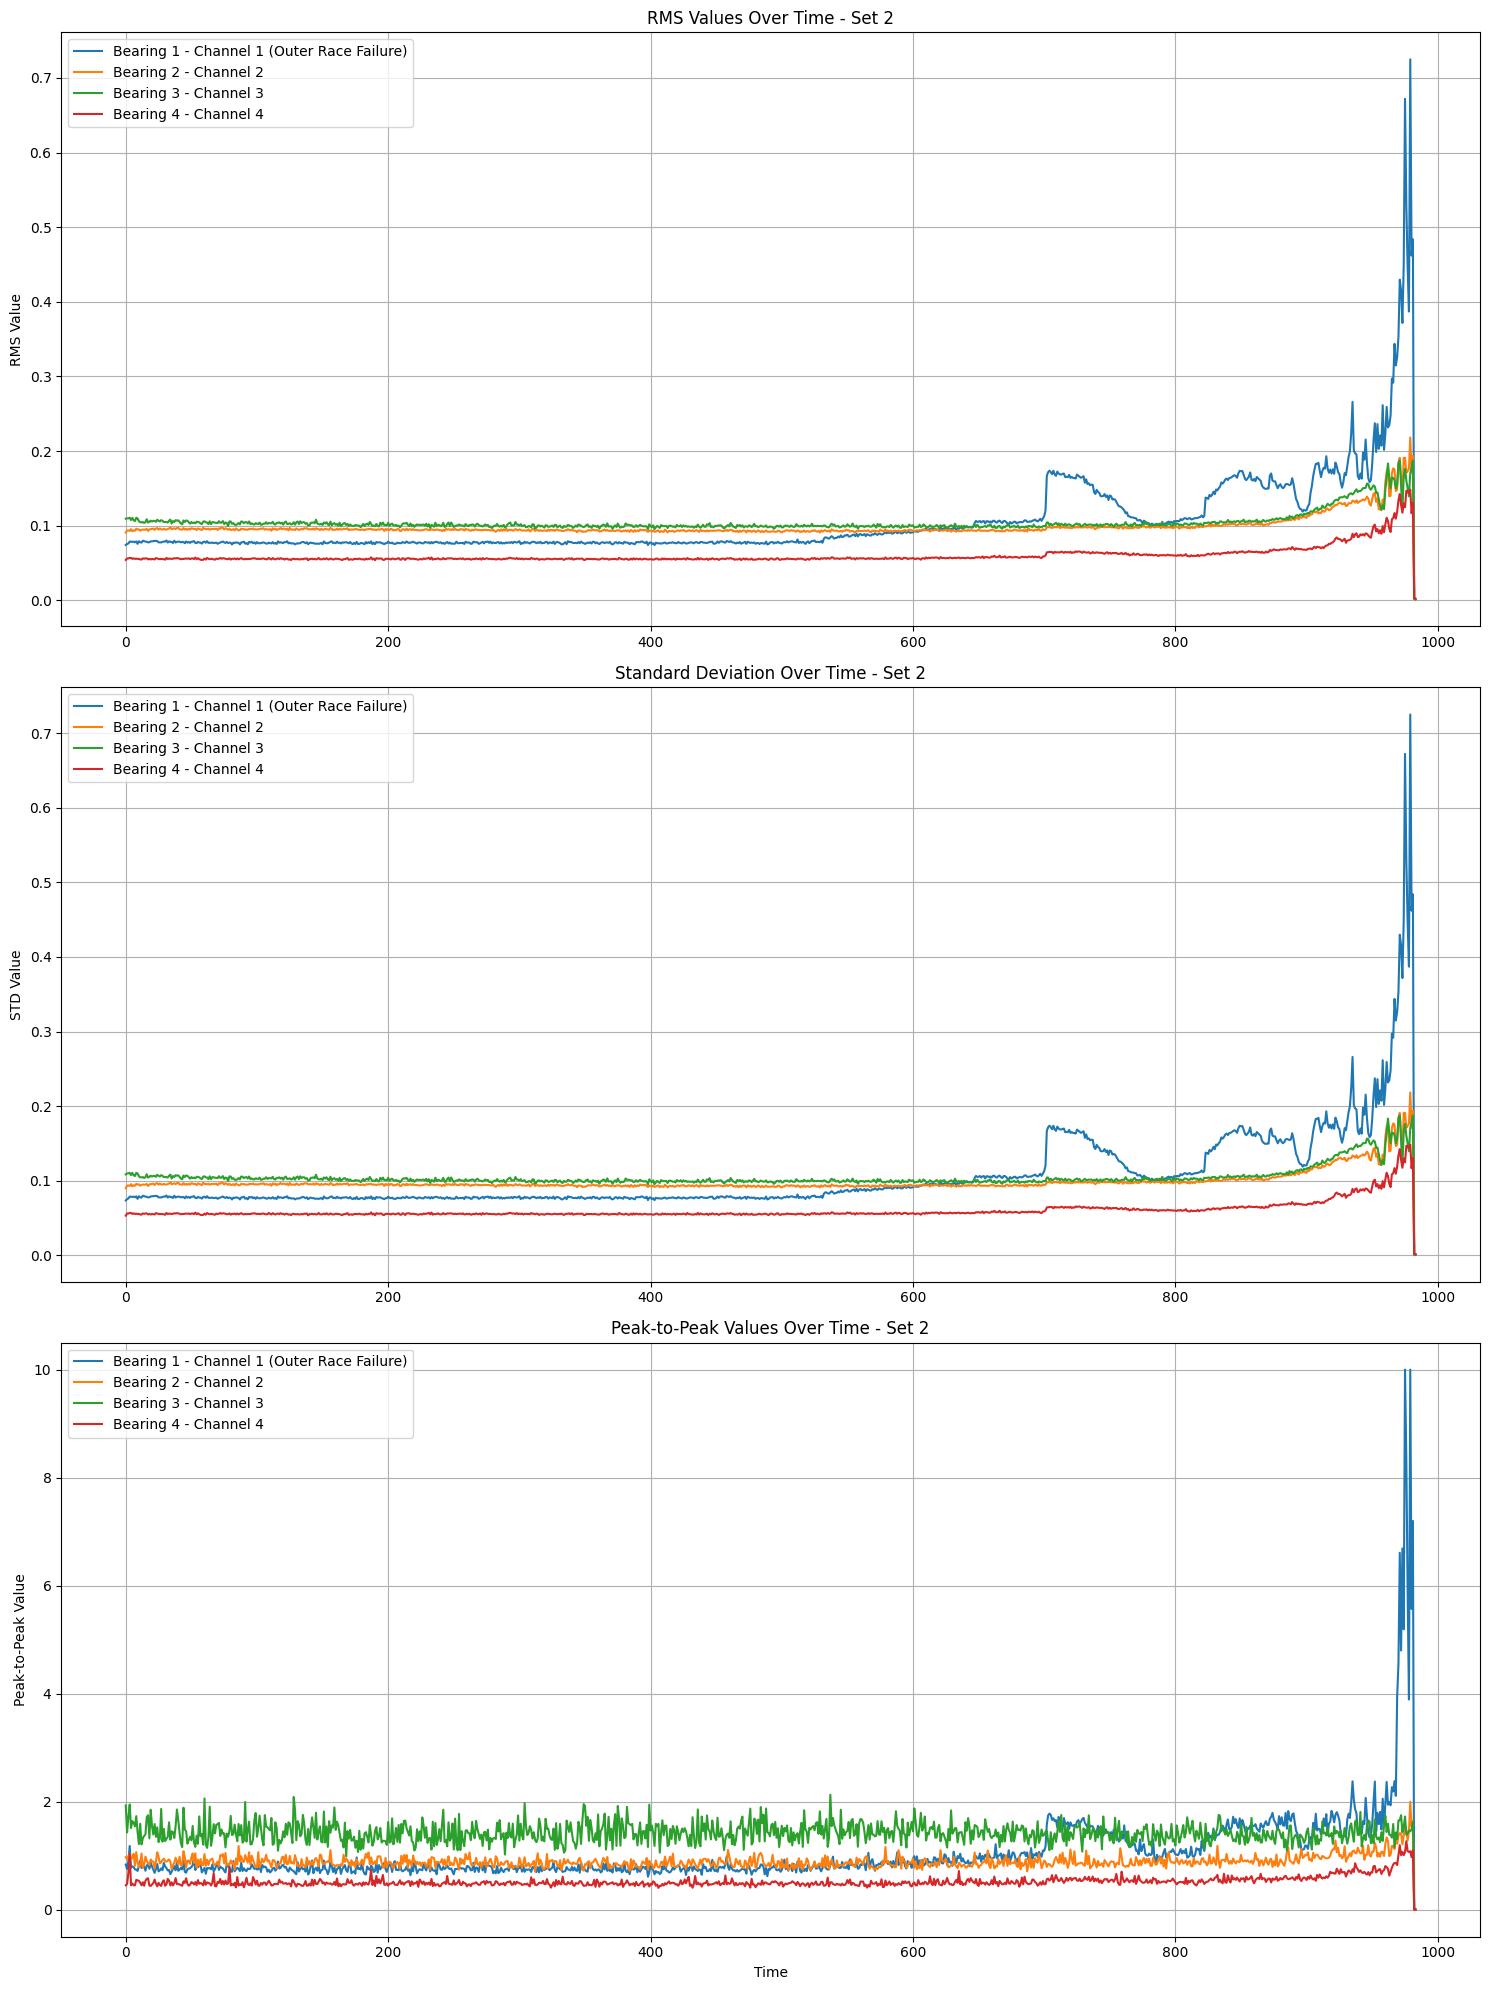

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# --- RMS Values ---
bearing_stats_2 = {
    'bearing1_ch1_rms': [],  # Bearing 1 - outer race failure
    'bearing2_ch2_rms': [],
    'bearing3_ch3_rms': [],
    'bearing4_ch4_rms': []
}

for stats in statistics_2:
    bearing_stats_2['bearing1_ch1_rms'].append(stats['Channel_1']['rms'])
    bearing_stats_2['bearing2_ch2_rms'].append(stats['Channel_2']['rms'])
    bearing_stats_2['bearing3_ch3_rms'].append(stats['Channel_3']['rms'])
    bearing_stats_2['bearing4_ch4_rms'].append(stats['Channel_4']['rms'])

# Plot RMS values
axes[0].plot(bearing_stats_2['bearing1_ch1_rms'], label='Bearing 1 - Channel 1 (Outer Race Failure)')
axes[0].plot(bearing_stats_2['bearing2_ch2_rms'], label='Bearing 2 - Channel 2')
axes[0].plot(bearing_stats_2['bearing3_ch3_rms'], label='Bearing 3 - Channel 3')
axes[0].plot(bearing_stats_2['bearing4_ch4_rms'], label='Bearing 4 - Channel 4')
axes[0].set_title('RMS Values Over Time - Set 2')
axes[0].set_ylabel('RMS Value')
axes[0].grid(True)
axes[0].legend()

# --- Standard Deviation ---
bearing_std_2 = {
    'bearing1_ch1_std': [stats['Channel_1']['std'] for stats in statistics_2],
    'bearing2_ch2_std': [stats['Channel_2']['std'] for stats in statistics_2],
    'bearing3_ch3_std': [stats['Channel_3']['std'] for stats in statistics_2],
    'bearing4_ch4_std': [stats['Channel_4']['std'] for stats in statistics_2]
}

# Plot STD values
axes[1].plot(bearing_std_2['bearing1_ch1_std'], label='Bearing 1 - Channel 1 (Outer Race Failure)')
axes[1].plot(bearing_std_2['bearing2_ch2_std'], label='Bearing 2 - Channel 2')
axes[1].plot(bearing_std_2['bearing3_ch3_std'], label='Bearing 3 - Channel 3')
axes[1].plot(bearing_std_2['bearing4_ch4_std'], label='Bearing 4 - Channel 4')
axes[1].set_title('Standard Deviation Over Time - Set 2')
axes[1].set_ylabel('STD Value')
axes[1].grid(True)
axes[1].legend()

# --- Peak-to-Peak ---
bearing_p2p_2 = {
    'bearing1_ch1_p2p': [stats['Channel_1']['peak_to_peak'] for stats in statistics_2],
    'bearing2_ch2_p2p': [stats['Channel_2']['peak_to_peak'] for stats in statistics_2],
    'bearing3_ch3_p2p': [stats['Channel_3']['peak_to_peak'] for stats in statistics_2],
    'bearing4_ch4_p2p': [stats['Channel_4']['peak_to_peak'] for stats in statistics_2]
}


axes[2].plot(bearing_p2p_2['bearing1_ch1_p2p'], label='Bearing 1 - Channel 1 (Outer Race Failure)')
axes[2].plot(bearing_p2p_2['bearing2_ch2_p2p'], label='Bearing 2 - Channel 2')
axes[2].plot(bearing_p2p_2['bearing3_ch3_p2p'], label='Bearing 3 - Channel 3')
axes[2].plot(bearing_p2p_2['bearing4_ch4_p2p'], label='Bearing 4 - Channel 4')
axes[2].set_title('Peak-to-Peak Values Over Time - Set 2')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Peak-to-Peak Value')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

#### Set 3

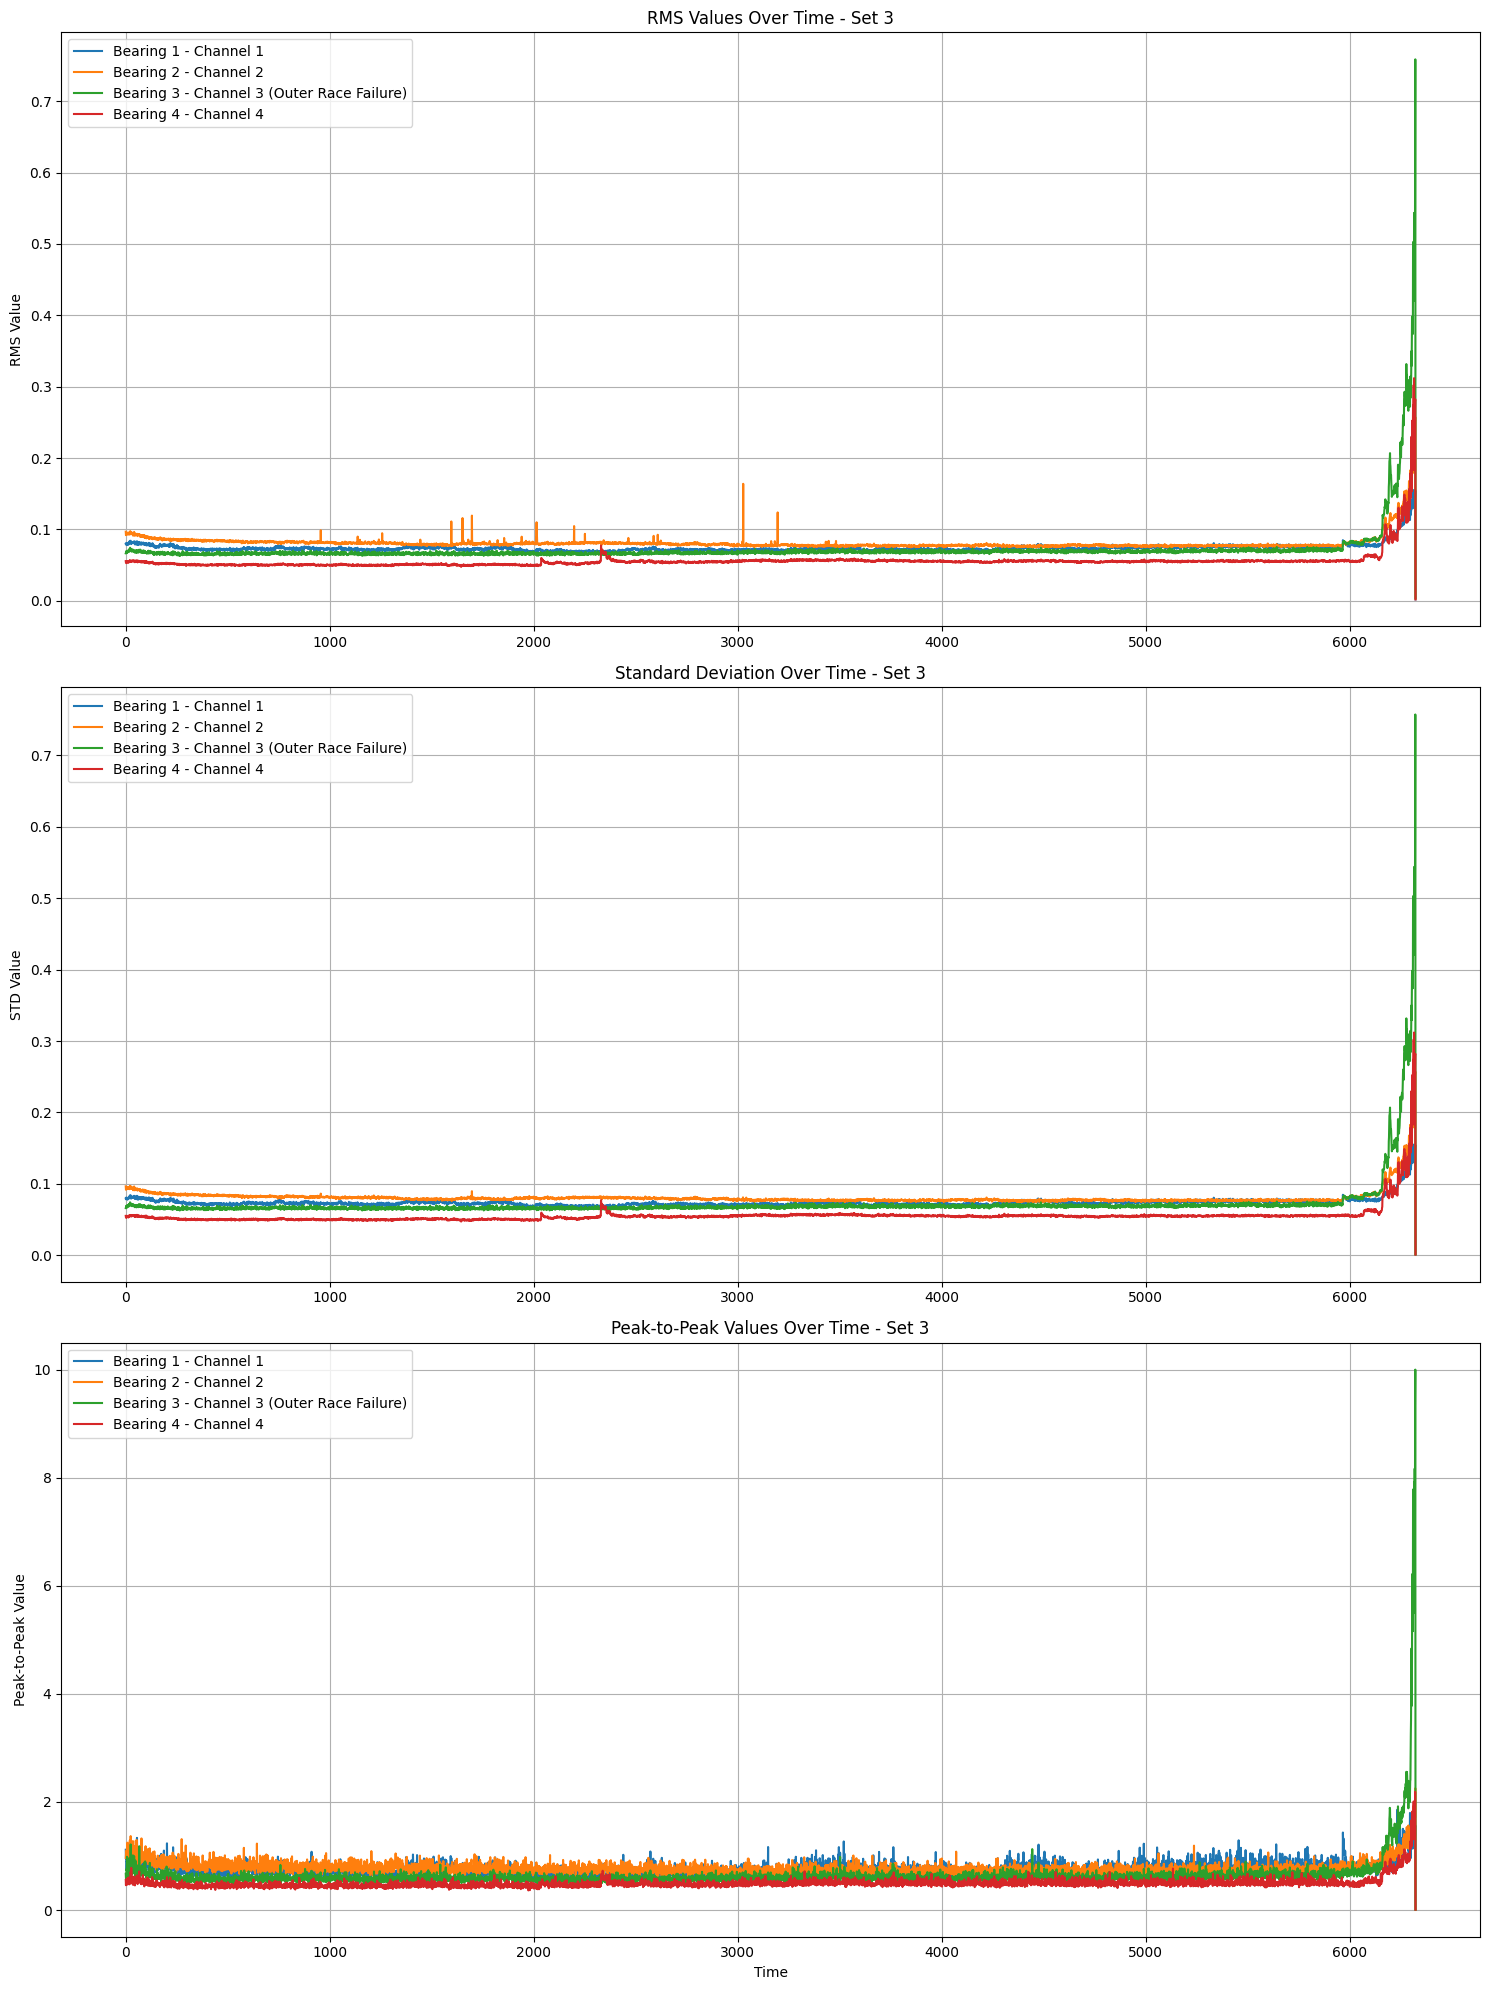

In [18]:
# Create figure with 3 subplots (RMS, STD, and peak-to-peak)
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# --- RMS Values ---
bearing_stats_3 = {
    'bearing1_ch1_rms': [],
    'bearing2_ch2_rms': [],
    'bearing3_ch3_rms': [],  # Bearing 3 - outer race failure
    'bearing4_ch4_rms': []
}

for stats in statistics_3:
    bearing_stats_3['bearing1_ch1_rms'].append(stats['Channel_1']['rms'])
    bearing_stats_3['bearing2_ch2_rms'].append(stats['Channel_2']['rms'])
    bearing_stats_3['bearing3_ch3_rms'].append(stats['Channel_3']['rms'])
    bearing_stats_3['bearing4_ch4_rms'].append(stats['Channel_4']['rms'])

# Plot RMS values
axes[0].plot(bearing_stats_3['bearing1_ch1_rms'], label='Bearing 1 - Channel 1')
axes[0].plot(bearing_stats_3['bearing2_ch2_rms'], label='Bearing 2 - Channel 2')
axes[0].plot(bearing_stats_3['bearing3_ch3_rms'], label='Bearing 3 - Channel 3 (Outer Race Failure)')
axes[0].plot(bearing_stats_3['bearing4_ch4_rms'], label='Bearing 4 - Channel 4')
axes[0].set_title('RMS Values Over Time - Set 3')
axes[0].set_ylabel('RMS Value')
axes[0].grid(True)
axes[0].legend()

# --- Standard Deviation ---
bearing_std_3 = {
    'bearing1_ch1_std': [stats['Channel_1']['std'] for stats in statistics_3],
    'bearing2_ch2_std': [stats['Channel_2']['std'] for stats in statistics_3],
    'bearing3_ch3_std': [stats['Channel_3']['std'] for stats in statistics_3],
    'bearing4_ch4_std': [stats['Channel_4']['std'] for stats in statistics_3]
}

# Plot STD values
axes[1].plot(bearing_std_3['bearing1_ch1_std'], label='Bearing 1 - Channel 1')
axes[1].plot(bearing_std_3['bearing2_ch2_std'], label='Bearing 2 - Channel 2')
axes[1].plot(bearing_std_3['bearing3_ch3_std'], label='Bearing 3 - Channel 3 (Outer Race Failure)')
axes[1].plot(bearing_std_3['bearing4_ch4_std'], label='Bearing 4 - Channel 4')
axes[1].set_title('Standard Deviation Over Time - Set 3')
axes[1].set_ylabel('STD Value')
axes[1].grid(True)
axes[1].legend()

# --- Peak-to-Peak ---
bearing_p2p_3 = {
    'bearing1_ch1_p2p': [stats['Channel_1']['peak_to_peak'] for stats in statistics_3],
    'bearing2_ch2_p2p': [stats['Channel_2']['peak_to_peak'] for stats in statistics_3],
    'bearing3_ch3_p2p': [stats['Channel_3']['peak_to_peak'] for stats in statistics_3],
    'bearing4_ch4_p2p': [stats['Channel_4']['peak_to_peak'] for stats in statistics_3]
}

# Plot Peak-to-Peak values
axes[2].plot(bearing_p2p_3['bearing1_ch1_p2p'], label='Bearing 1 - Channel 1')
axes[2].plot(bearing_p2p_3['bearing2_ch2_p2p'], label='Bearing 2 - Channel 2')
axes[2].plot(bearing_p2p_3['bearing3_ch3_p2p'], label='Bearing 3 - Channel 3 (Outer Race Failure)')
axes[2].plot(bearing_p2p_3['bearing4_ch4_p2p'], label='Bearing 4 - Channel 4')
axes[2].set_title('Peak-to-Peak Values Over Time - Set 3')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Peak-to-Peak Value')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

## 2.4 Analyzing Bearing Health Over Time

This section focuses on analyzing bearing health over time using various metrics derived from vibration data, including RMS (Root Mean Square) and Peak-to-Peak values. We calculate these metrics throughout the bearing's lifecycle to track health progression and identify failure patterns.

### Functions Overview
1. `analyze_all_bearings(statistics, set_num)`
   * Performs comprehensive analysis of all bearings in a dataset
   * Calculates baseline metrics from first 100 measurements
   * Compares baseline to final metrics (last 10% of data)
   * Identifies significant changes in RMS and Peak-to-Peak values
   * Handles different channel configurations for each dataset:
     - Set 1: Two channels per bearing
     - Sets 2 & 3: One channel per bearing


2. `calculate_bearing_health_score(baseline_rms, current_rms, baseline_p2p, current_p2p)`
   * Computes a health score (0-100) based on the percentage increase in RMS and Peak-to-Peak values
   * Weighted scoring system (40% RMS, 60% Peak-to-Peak) for optimal sensitivity
   * Score interpretation:
     - 70-100: Normal operation
     - 40-70: Warning level
     - Below 40: Critical failure

3. `analyze_bearing_health_trends(statistics, set_num, bearing_num)`
   * Tracks bearing health throughout its entire lifetime
   * Uses baseline metrics from first 100 readings
   * Special handling for different failure types:
     - Standard bearings: Evaluates worst health in final 10% of lifetime
     - Roller element failure (Set 1, Bearing 4): Analyzes entire timeline
   * Prevents false recovery readings by maintaining critical status once reached

### Key Innovation: Early Detection of Roller Element Failure

A significant finding in our analysis was the unique failure pattern of Set 1's Bearing 4 (roller element failure). Unlike other bearings that showed deterioration in their final 10% of life, this bearing exhibited critical health issues at 81.3% through its lifetime (file 1752 of 2156). This discovery led to two important implementation decisions:

1. Full Timeline Analysis: For roller element failures, we examine the entire operational timeline rather than just the final 10%
2. Failure Point Detection: The system identifies and reports the exact point where roller element deterioration becomes critical

### Example Output

```python
=== Bearing Health Analysis ===

Set 1, Bearing 4 (Roller Element):
Roller Element Failure detected at file 1752
Percentage through lifetime: 81.3%
Initial Health: 100
Worst Health: 28
Final Health: 28
Condition Assessment: CRITICAL FAILURE

Set 1, Bearing 3 (Inner Race):
Initial Health: 100
Worst Health: 2
Final Health: 2
Condition Assessment: CRITICAL FAILURE
```

### Analysis Workflow

1. Initial Score Calculation
   * Calculate baseline metrics from first 100 readings
   * Track health scores throughout bearing lifetime

2. Failure Detection Strategy
   * For roller element failure: Analyze entire timeline to catch early deterioration
   * For other failures: Focus on final 10% of operational life
   * Maintain critical status once reached to prevent false recoveries

3. Health Score Interpretation
   * Scores above 70 indicate normal operation
   * Scores between 40-70 trigger warning status
   * Scores below 40 indicate critical failure


In [ ]:
def analyze_all_bearings(statistics, set_num):
    """
    Analyze all bearings in a dataset, both healthy and failed.
    """
    print(f"\n=== Analysis for Set {set_num} ===")
    
    # Number of bearings in each set
    num_bearings = 4
    
    failed_bearings = {
        1: [3, 4],    # Set 1: Bearings 3 and 4 failed
        2: [1],       # Set 2: Bearing 1 failed
        3: [3]        # Set 3: Bearing 3 failed
    }
    
    for bearing_num in range(1, num_bearings + 1):
        if set_num == 1:
            channels = [f'Channel_{2*bearing_num-1}', f'Channel_{2*bearing_num}']
        else:
            channels = [f'Channel_{bearing_num}']
        
        rms_values = []
        p2p_values = []
        std_values = []  
        
        for stats in statistics:
            bearing_rms = np.mean([stats[ch]['rms'] for ch in channels])
            bearing_p2p = np.mean([stats[ch]['peak_to_peak'] for ch in channels])
            bearing_std = np.mean([stats[ch]['std'] for ch in channels])  # Added STD
            rms_values.append(bearing_rms)
            p2p_values.append(bearing_p2p)
            std_values.append(bearing_std)  
        
        # Calculate metrics
        baseline_rms = np.mean(rms_values[:100])
        baseline_p2p = np.mean(p2p_values[:100])
        baseline_std = np.mean(std_values[:100])  
        
        last_segment = int(len(rms_values) * 0.1)
        max_rms = max(rms_values[-last_segment:])
        max_p2p = max(p2p_values[-last_segment:])
        max_std = max(std_values[-last_segment:])  
        
        status = "FAILED" if bearing_num in failed_bearings.get(set_num, []) else "HEALTHY"
        print(f"\nBearing {bearing_num} - {status}")
        print(f"Baseline RMS: {baseline_rms:.4f}")
        print(f"Maximum RMS: {max_rms:.4f}")
        print(f"RMS Increase: {(max_rms/baseline_rms - 1)*100:.1f}%")
        print(f"Baseline STD: {baseline_std:.4f}")  
        print(f"Maximum STD: {max_std:.4f}") 
        print(f"STD Increase: {(max_std/baseline_std - 1)*100:.1f}%")  
        print(f"Baseline Peak-to-Peak: {baseline_p2p:.4f}")
        print(f"Maximum Peak-to-Peak: {max_p2p:.4f}")
        print(f"Peak-to-Peak Increase: {(max_p2p/baseline_p2p - 1)*100:.1f}%")

# Analyze all bearings in each set
analyze_all_bearings(statistics_1, 1)
analyze_all_bearings(statistics_2, 2)
analyze_all_bearings(statistics_3, 3)


=== Analysis for Set 1 ===

Bearing 1 - HEALTHY
Baseline RMS: 0.1239
Maximum RMS: 0.1664
RMS Increase: 34.4%
Baseline STD: 0.0791
Maximum STD: 0.1180
STD Increase: 49.1%
Baseline Peak-to-Peak: 1.0359
Maximum Peak-to-Peak: 1.3565
Peak-to-Peak Increase: 31.0%

Bearing 2 - HEALTHY
Baseline RMS: 0.1267
Maximum RMS: 0.2067
RMS Increase: 63.2%
Baseline STD: 0.0836
Maximum STD: 0.1701
STD Increase: 103.5%
Baseline Peak-to-Peak: 0.8370
Maximum Peak-to-Peak: 1.4700
Peak-to-Peak Increase: 75.6%

Bearing 3 - FAILED
Baseline RMS: 0.1324
Maximum RMS: 0.5448
RMS Increase: 311.4%
Baseline STD: 0.0944
Maximum STD: 0.5309
STD Increase: 462.2%
Baseline Peak-to-Peak: 0.9945
Maximum Peak-to-Peak: 9.4470
Peak-to-Peak Increase: 850.0%

Bearing 4 - FAILED
Baseline RMS: 0.1136
Maximum RMS: 0.2214
RMS Increase: 94.9%
Baseline STD: 0.0654
Maximum STD: 0.1889
STD Increase: 189.0%
Baseline Peak-to-Peak: 0.7759
Maximum Peak-to-Peak: 1.9875
Peak-to-Peak Increase: 156.2%

=== Analysis for Set 2 ===

Bearing 1 - FAI

In [20]:
def calculate_bearing_health_score(baseline_rms, current_rms, baseline_p2p, current_p2p):
    """
    Calculate a health score (0-100) for a bearing based on our findings:
    - 100: Perfect health
    - 70-100: Normal operation
    - 40-70: Watch closely
    - Below 40: Critical
    """
    # Calculate percentage increases
    rms_increase = (current_rms / baseline_rms - 1) * 100
    p2p_increase = (current_p2p / baseline_p2p - 1) * 100
    
    # Convert to a 0-100 score based on our findings from healthy vs failed bearings
    rms_score = max(0, min(100, 100 - (rms_increase / 3)))  # 300% increase -> score of 0
    p2p_score = max(0, min(100, 100 - (p2p_increase / 8)))  # 800% increase -> score of 0
    
    # Combine scores (weighted towards Peak-to-Peak as it's more sensitive)
    final_score = round(0.4 * rms_score + 0.6 * p2p_score)
    
    # Determine status
    if final_score >= 70:
        status = "HEALTHY"
    elif final_score >= 40:
        status = "WARNING"
    else:
        status = "CRITICAL"
        
    return final_score, status


In [22]:
def analyze_bearing_health_trends(statistics, set_num, bearing_num):
    """
    Analyze bearing health trends with special handling for different failure types.
    Takes full timeline into account for roller element failure detection.
    """
    # Get channels based on dataset
    if set_num == 1:
        channels = [f'Channel_{2*bearing_num-1}', f'Channel_{2*bearing_num}']
    else:
        channels = [f'Channel_{bearing_num}']
    
    # Calculate baseline from first 100 readings
    baseline_rms = np.mean([np.mean([stats[ch]['rms'] for ch in channels]) 
                           for stats in statistics[:100]])
    baseline_p2p = np.mean([np.mean([stats[ch]['peak_to_peak'] for ch in channels]) 
                           for stats in statistics[:100]])
    
    # Calculate scores over time
    scores = []
    for stats in statistics:
        current_rms = np.mean([stats[ch]['rms'] for ch in channels])
        current_p2p = np.mean([stats[ch]['peak_to_peak'] for ch in channels])
        score, status = calculate_bearing_health_score(baseline_rms, current_rms, 
                                                     baseline_p2p, current_p2p)
        scores.append(score)
    
    # Get initial score
    initial_score = scores[0]
    
    # Special handling for roller element failure
    if set_num == 1 and bearing_num == 4:
        # Look at full timeline for roller element failure
        worst_score = min(scores)
        worst_index = scores.index(worst_score)
        print(f"Roller Element Failure detected at file {worst_index}")
        print(f"Percentage through lifetime: {(worst_index/len(scores))*100:.1f}%")
    else:
        # Use last 10% for other bearings
        worst_score = min(scores[-int(len(scores)*0.1):])
    
    # Once a bearing hits critical, it stays critical
    if worst_score < 40:
        final_score = worst_score
    else:
        final_score = scores[-1]
    
    return initial_score, worst_score, final_score

# Analyze all failing bearings
print("=== Bearing Health Analysis ===")

# Set 1 failing bearings
print("\nSet 1, Bearing 3 (Inner Race):")
initial, worst, final = analyze_bearing_health_trends(statistics_1, 1, 3)
print(f"Initial Health: {initial}")
print(f"Worst Health: {worst}")
print(f"Final Health: {final}")
if worst < 40:
    condition = "CRITICAL FAILURE"
elif worst < 70:
    condition = "WARNING LEVEL"
else:
    condition = "MODERATE WEAR"
print(f"Condition Assessment: {condition}")

print("\nSet 1, Bearing 4 (Roller Element):")
initial, worst, final = analyze_bearing_health_trends(statistics_1, 1, 4)
print(f"Initial Health: {initial}")
print(f"Worst Health: {worst}")
print(f"Final Health: {final}")
if worst < 40:
    condition = "CRITICAL FAILURE"
elif worst < 70:
    condition = "WARNING LEVEL"
else:
    condition = "MODERATE WEAR"
print(f"Condition Assessment: {condition}")

# Set 2 failing bearing
print("\nSet 2, Bearing 1 (Outer Race):")
initial, worst, final = analyze_bearing_health_trends(statistics_2, 2, 1)
print(f"Initial Health: {initial}")
print(f"Worst Health: {worst}")
print(f"Final Health: {final}")
if worst < 40:
    condition = "CRITICAL FAILURE"
elif worst < 70:
    condition = "WARNING LEVEL"
else:
    condition = "MODERATE WEAR"
print(f"Condition Assessment: {condition}")

# Set 3 failing bearing
print("\nSet 3, Bearing 3 (Outer Race):")
initial, worst, final = analyze_bearing_health_trends(statistics_3, 3, 3)
print(f"Initial Health: {initial}")
print(f"Worst Health: {worst}")
print(f"Final Health: {final}")
if worst < 40:
    condition = "CRITICAL FAILURE"
elif worst < 70:
    condition = "WARNING LEVEL"
else:
    condition = "MODERATE WEAR"
print(f"Condition Assessment: {condition}")

=== Bearing Health Analysis ===

Set 1, Bearing 3 (Inner Race):
Initial Health: 100
Worst Health: 2
Final Health: 2
Condition Assessment: CRITICAL FAILURE

Set 1, Bearing 4 (Roller Element):
Roller Element Failure detected at file 1752
Percentage through lifetime: 81.3%
Initial Health: 100
Worst Health: 28
Final Health: 28
Condition Assessment: CRITICAL FAILURE

Set 2, Bearing 1 (Outer Race):
Initial Health: 99
Worst Health: 0
Final Health: 0
Condition Assessment: CRITICAL FAILURE

Set 3, Bearing 3 (Outer Race):
Initial Health: 100
Worst Health: 0
Final Health: 0
Condition Assessment: CRITICAL FAILURE
